This Jupyter notebook demonstrates how the Gliquid binary fitting code works, and how it can be used to fit the liquid non-ideal mixing parameters for a user-input system

In [9]:
import os

# Set the environmental variables for cache directory (where data files are stored) and Materials Project API keys.
# The legacy Materials Project API key is only necessary if 'dft_type' is set to 'GGA' or if the element 'Yb' is used.
os.environ["CACHE_DIRECTORY"] = "data"
os.environ["LEGACY_MP_API_KEY"] = "2d5wyVmhDCpPMAkq"
os.environ["NEW_MP_API_KEY"] = "Jcw46im7UV1xOfHzbZZ8nkq8BH00Pf6s"

# Cache directory must be set before anything from gliquid_binary can be imported. Otherwise, it will create a new one
from gliquid_binary import BinaryLiquid, BLPlotter

Cu: H_fusion = 13260.0 J/mol, T_fusion = 1357.77 K, T_vaporization = 2835.15 K
Mg: H_fusion = 8480.0 J/mol, T_fusion = 923.0 K, T_vaporization = 1363.15 K

Loading JSON from cache.
reading MPDS liquidus from entry at https://mpds.io/entry/C906729...

--- Low temperature phases including component solid solutions ---
{'type': 'ss', 'name': '(Cu)', 'comp': 0.000381243, 'cbounds': [[0.000381243, 673.505], [0.0669068, 994.389]], 'tbounds': [[0.000381243, 673.505], [0.000381243, 1352.52]]}
{'type': 'lc', 'name': 'MgCu2', 'comp': 0.332825, 'tbounds': [[0.332825, 673.15], [0.332825, 1086.657]]}
{'type': 'lc', 'name': 'Mg2Cu', 'comp': 0.6666030000000001, 'tbounds': [[0.6666030000000001, 673.15], [0.6666030000000001, 838.482]]}
--- Identified invariant points ---
{'type': 'eut', 'comp': 0.22010100000000002, 'temp': 994.1469999999999, 'phases': ['(Cu)', 'MgCu2'], 'phase_comps': [0.000381243, 0.332825]}
{'type': 'cmp', 'comp': 0.332825, 'temp': 1086.657, 'phases': ['MgCu2'], 'phase_comps': [0.332

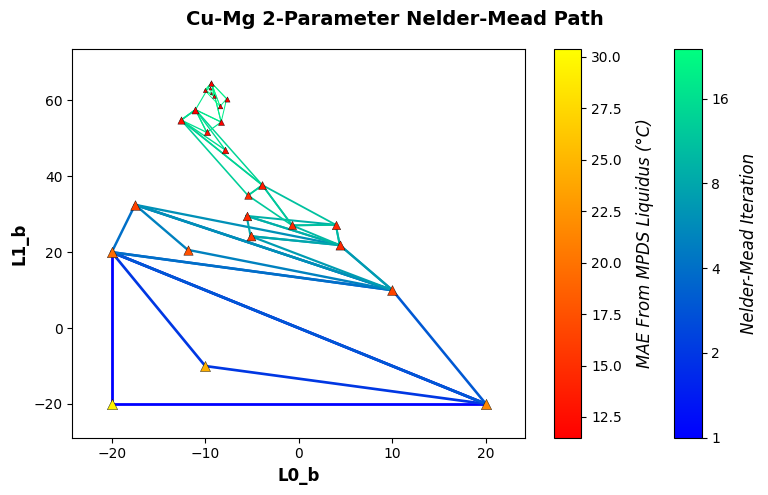

In [10]:
cu_mg_system = BinaryLiquid.from_cache('Cu-Mg')
fit_results = cu_mg_system.fit_parameters(verbose=True)[0]

print("--- Cu-Mg non-ideal mixing parameter fitting results: ---")
for field, value in fit_results.items():
    if isinstance(value, float):
        print(f'{field.upper()}: {value:.3f}')   

cu_mg_plotter = BLPlotter(cu_mg_system)
cu_mg_plotter.show('fit+liq')
cu_mg_plotter.show('nmp')

In [3]:
import json
import numpy as np

other_systems_to_fit = ['C-Nb', 'Cr-Eu', 'B-Dy', 'Ag-V', 'Al-Cu']

cache_file = os.path.join(os.getenv("CACHE_DIRECTORY", ""), "fit_results_cache")

# If results are already cached, skip the fitting of the systems. If you wish to re-run the fitting, delete the cache
if os.path.exists(cache_file):
    with open(cache_file, "r") as f:
        print("Loading fitting results from cache")
        fitting_results = json.load(f)
        for sys_results in fitting_results.values():
            sys_results['nmpath'] = np.array(sys_results.get('nmpath', []))
else:
    fitting_results = {}

    # Iterate through systems and fit non-ideal mixing parameters
    for sys_name in other_systems_to_fit:
        bl = BinaryLiquid.from_cache(sys_name)
        fitting_attempts_data = bl.fit_parameters(verbose=False, n_opts=3)
        best_fit_data = min(fitting_attempts_data, key=lambda x: x['mae'], default={})
        fitting_results[sys_name] = best_fit_data

    # Cache the results
    with open(cache_file, "w") as f:
        print("Saving fitting results to cache")
        for sys_results in fitting_results.values():
            sys_results['nmpath'] = sys_results.get('nmpath', []).tolist() # Numpy ndarray is not JSON serializable
        json.dump(fitting_results, f)

Loading fitting results from cache


In [ ]:
for sys_name, best_results in fitting_results.items():
    print(f"{sys_name}: MAE = {best_results['mae']}")
    bl = BinaryLiquid.from_cache(sys_name)
    bl.update_params((best_results['L0_a'], best_results['L0_b'], best_results['L1_a'], best_results['L1_b']))
    blp = BLPlotter(bl)
    blp.show('fit+liq')
    blp.show('ch+g') # Specify specific temperatures for plotted liquid energy with t_vals and t_units arguments

C-Nb: MAE = 37.979053807322046
C: H_fusion = 117400.0 J/mol, T_fusion = 4762.0 K, T_vaporization = 5100.15 K
Nb: H_fusion = 30000.0 J/mol, T_fusion = 2750.0 K, T_vaporization = 5017.15 K

Loading JSON from cache.
reading MPDS liquidus from entry at https://mpds.io/entry/C905339...



No arguments specified for 't_vals', setting 't_units' to 'K'


Cr-Eu: MAE = 15.531783625335637
Cr: H_fusion = 21000.0 J/mol, T_fusion = 2180.0 K, T_vaporization = 2944.15 K
Eu: H_fusion = 9210.0 J/mol, T_fusion = 1095.0 K, T_vaporization = 1800.15 K

Loading JSON from cache.
reading MPDS liquidus from entry at https://mpds.io/entry/C907707...



No arguments specified for 't_vals', setting 't_units' to 'K'


B-Dy: MAE = 53.234081113203615
B: H_fusion = 50200.0 J/mol, T_fusion = 2350.0 K, T_vaporization = 4273.15 K
Dy: H_fusion = 11060.0 J/mol, T_fusion = 1685.0 K, T_vaporization = 2840.15 K

Loading JSON from cache.
reading MPDS liquidus from entry at https://mpds.io/entry/C900285...



No arguments specified for 't_vals', setting 't_units' to 'K'


Ag-V: MAE = 14.816633624675644
Ag: H_fusion = 11300.0 J/mol, T_fusion = 1234.93 K, T_vaporization = 2435.15 K
V: H_fusion = 21500.0 J/mol, T_fusion = 2183.0 K, T_vaporization = 3680.15 K

Loading JSON from cache.
reading MPDS liquidus from entry at https://mpds.io/entry/C900067...



No arguments specified for 't_vals', setting 't_units' to 'K'


Al-Cu: MAE = 23.600196630926895
Al: H_fusion = 10710.0 J/mol, T_fusion = 933.5 K, T_vaporization = 2792.15 K
Cu: H_fusion = 13260.0 J/mol, T_fusion = 1357.77 K, T_vaporization = 2835.15 K

Loading JSON from cache.
reading MPDS liquidus from entry at https://mpds.io/entry/C903362...



No arguments specified for 't_vals', setting 't_units' to 'K'
